## Import Libraries

In [1]:
import skimage
from skimage import data

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Read the image

In [3]:
bird = mpimg.imread("datasets/images/bird.jpeg")

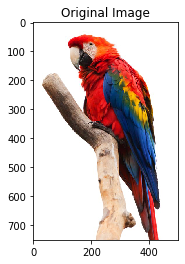

In [4]:
plt.title("Original Image")
plt.imshow(bird)

In [5]:
bird.shape

(750, 500, 3)

In [6]:
len(bird)

750

In [7]:
bird[200: 250, 200:250]

array([[[157,   9,   9],
        [178,  25,  28],
        [186,  30,  34],
        ...,
        [ 58,  90, 167],
        [ 45,  84, 151],
        [ 57, 102, 157]],

       [[148,   6,   5],
        [164,  18,  21],
        [170,  21,  27],
        ...,
        [ 68,  91, 171],
        [ 51,  84, 153],
        [ 61, 101, 160]],

       [[139,   3,   5],
        [150,   9,  15],
        [152,   9,  15],
        ...,
        [ 71,  88, 170],
        [ 56,  85, 155],
        [ 63, 103, 165]],

       ...,

       [[197,  26,  16],
        [209,  28,  21],
        [215,  26,  24],
        ...,
        [ 35,  53, 125],
        [ 49,  42, 119],
        [ 41,  48, 116]],

       [[199,  27,  17],
        [213,  30,  26],
        [220,  32,  30],
        ...,
        [ 31,  49, 121],
        [ 45,  38, 115],
        [ 34,  43, 108]],

       [[199,  27,  17],
        [210,  28,  24],
        [215,  31,  29],
        ...,
        [ 33,  52, 121],
        [ 41,  41, 113],
        [ 31,  45, 108]]

## Cleaning Transformations

### Reshape

In [65]:
bird.shape

(750, 500, 3)

In [13]:
bird_reshape = bird.reshape(750 ,500,3)

bird_reshape.shape

(750, 500, 3)

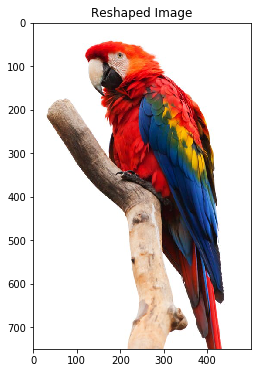

In [14]:
plt.figure (figsize = (6, 6))
plt.title("Reshaped Image")
plt.imshow(bird_reshape)

### Resize

In [77]:
bird_resized = skimage.transform.resize(bird, (500, 500))

bird_resized.shape

(500, 500, 3)

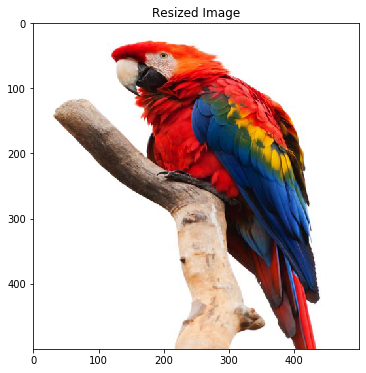

In [78]:
plt.figure (figsize = (6,6))
plt.title("Resized Image")
plt.imshow(bird_resized)

In [79]:
bird.shape[1]

500

In [80]:
float(bird.shape[0])

750.0

In [81]:
aspect_ratio_original = bird.shape[1] / float(bird.shape[0])
aspect_ratio_resized = bird_resized.shape[1] / float(bird_resized.shape[0])

print("Original aspect ratio: ", aspect_ratio_original)
print("Resized aspect ratio: ", aspect_ratio_resized)

Original aspect ratio:  0.6666666666666666
Resized aspect ratio:  1.0


### Rescaling preserving aspect ratio

In [82]:
bird_rescaled = skimage.transform.rescale(bird_resized, (1.0, aspect_ratio_original))

bird_rescaled.shape

(500, 333, 3)

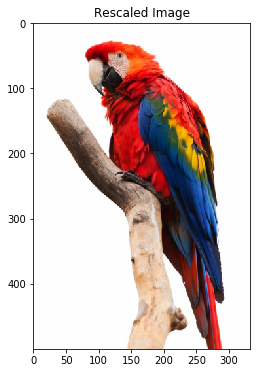

In [83]:
plt.figure(figsize=(6,6)) 
plt.title("Rescaled Image")
plt.imshow(bird_rescaled) 

In [84]:
aspect_ratio_rescaled = bird_rescaled.shape[1] / float(bird_rescaled.shape[0])

print("Rescaled aspect ratio: ", aspect_ratio_rescaled)

Rescaled aspect ratio:  0.666


### Reversing color order from RGB to BGR

Used in certain frameworks such as OpenCV and Caffe2

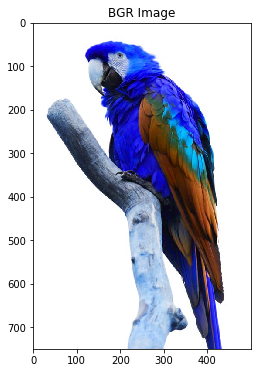

In [85]:
bird_BGR = bird[:, :, (2, 1, 0)]

plt.figure (figsize = (6, 6))
plt.title("BGR Image")
plt.imshow(bird_BGR)

In [86]:
bird_BGR.shape

(750, 500, 3)

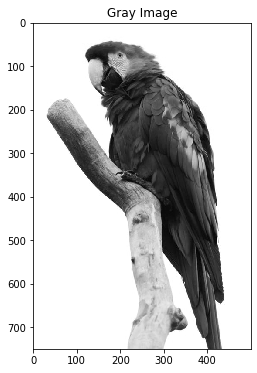

In [87]:
bird_gray = skimage.color.rgb2gray(bird)

plt.figure (figsize = (6,6))
plt.title("Gray Image")
plt.imshow(bird_gray, cmap = 'gray')

In [88]:
bird_gray.shape

(750, 500)

### Cropping 

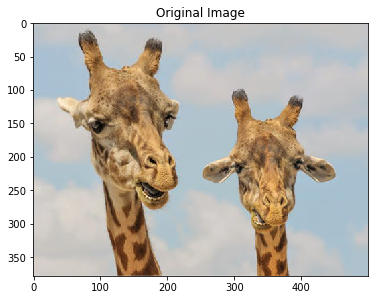

In [89]:
giraffes = skimage.img_as_float(skimage.io.imread('datasets/images/giraffes.jpg')).astype(np.float32)

plt.figure (figsize = (6, 6))
plt.title("Original Image")
plt.imshow(giraffes)

In [90]:
giraffes.shape

(378, 500, 3)

In [91]:
def crop(image, cropx, cropy):
    
    y, x, c = image.shape
    
    startx = x//2 - (cropx // 8)
    starty = y//3 - (cropy // 4) 
    
    stopx = startx + cropx
    stopy = starty + 2*cropy
    
    return image[starty:stopy, startx:stopx]

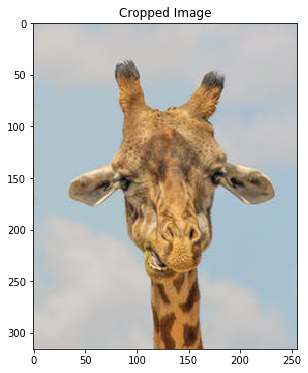

In [139]:
giraffes_cropped = crop (giraffes, 256, 256)

plt.figure (figsize = (6,6))
plt.title("Cropped Image")
plt.imshow(giraffes_cropped)

### Denoising Images

In [93]:
from skimage.util import random_noise

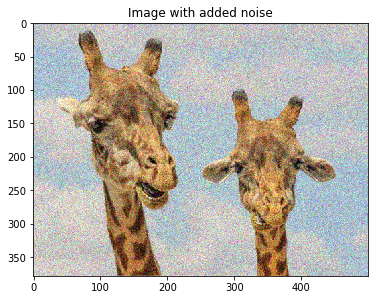

In [149]:
sigma = 0.155
noisy_giraffes = random_noise(giraffes, var=sigma**2.5)

plt.figure (figsize = (6, 6))
plt.title("Image with added noise")
plt.imshow(noisy_giraffes)

In [143]:
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral, denoise_wavelet, estimate_sigma

#### Estimate the average noise standard deviation across color channels.


In [144]:
sigma_est = estimate_sigma(noisy_giraffes, 
                           multichannel=True, 
                           average_sigmas=True)
sigma_est

0.42399462727560194

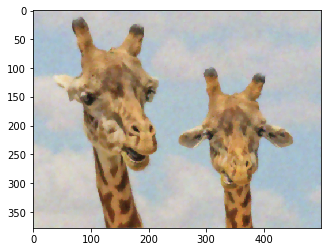

In [150]:
plt.imshow(denoise_tv_chambolle(noisy_giraffes, 
                                weight=0.1, 
                                multichannel=True))

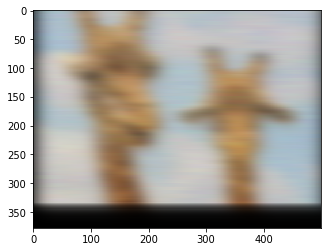

In [101]:
plt.imshow(denoise_bilateral(noisy_giraffes, 
                             sigma_color=0.05, 
                             sigma_spatial=15,
                             multichannel=True))

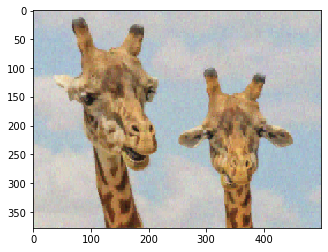

In [151]:
plt.imshow(denoise_wavelet(noisy_giraffes, multichannel=True))

## Augmentation transformations

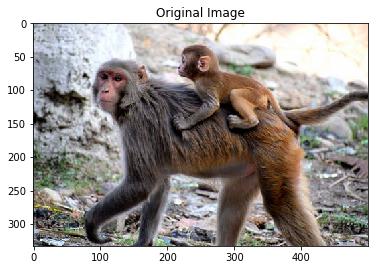

In [103]:
monkeys = skimage.img_as_float(skimage.io.imread('datasets/images/monkeys.jpeg')).astype(np.float32)

plt.figure (figsize = (6, 6))
plt.title("Original Image")
plt.imshow(monkeys)

#### Flip

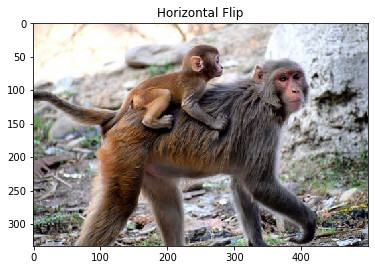

In [104]:
monkeys_flip = np.fliplr(monkeys)

plt.figure (figsize = (6, 6))
plt.title("Horizontal Flip")
plt.imshow(monkeys_flip)

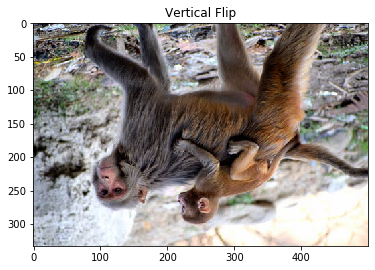

In [105]:
monkeys_flip = np.flipud(monkeys)

plt.figure (figsize = (6, 6))
plt.title("Vertical Flip")
plt.imshow(monkeys_flip)

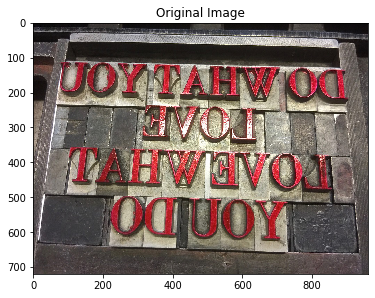

In [106]:
mirror = skimage.img_as_float(skimage.io.imread('datasets/images/book-mirrored.jpg')).astype(np.float32)

plt.figure (figsize = (6,6))
plt.title("Original Image")
plt.imshow(mirror)

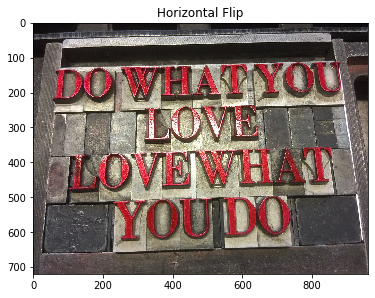

In [107]:
mirror_flip = np.fliplr(mirror)

plt.figure (figsize = (6, 6))
plt.title("Horizontal Flip")
plt.imshow(mirror_flip)

#### Rotation

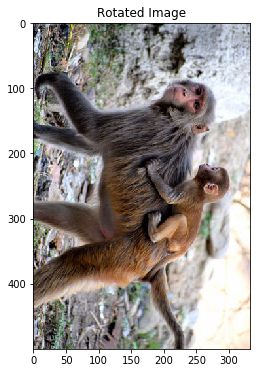

In [108]:
monkeys_rotate = np.rot90(monkeys, 3)

plt.figure (figsize = (6, 6))
plt.title("Rotated Image")
plt.imshow(monkeys_rotate)

In [129]:
import random
from scipy import ndarray

def random_rotation(image_array: ndarray):

    random_degree = random.uniform(-250, 250)
    return skimage.transform.rotate(image_array, random_degree)

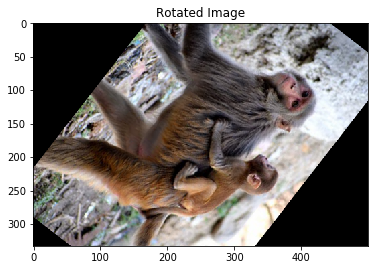

In [130]:
monkeys_angle= random_rotation (monkeys)

plt.figure (figsize = (6,6))
plt.title("Rotated Image")
plt.imshow(monkeys_angle)

#### Swirl

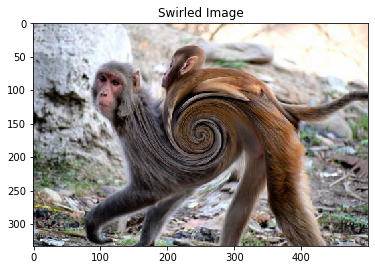

In [137]:
from skimage.transform import swirl
monkeys_swirl = swirl(monkeys, strength=10, radius = 200)

plt.figure (figsize = (6, 6))
plt.title("Swirled Image")
plt.imshow(monkeys_swirl)